In [ ]:
!pip install --upgrade yasa

In [10]:
import yasa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mne.filter import filter_data
sns.set(font_scale=1.2)

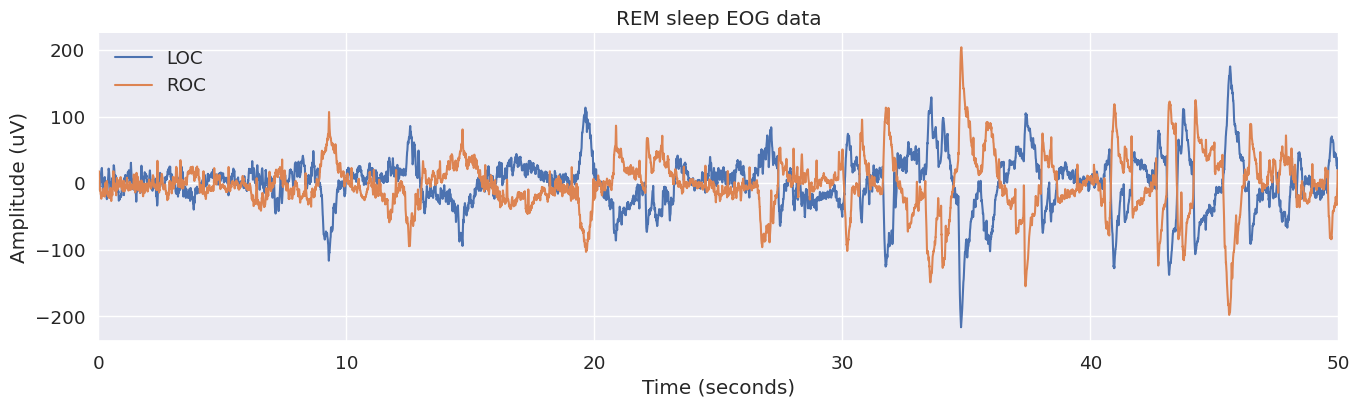

In [3]:
#/workspaces/codespaces-jupyter/data/data_EOGs_REM_256Hz.npz

# Load data
file = np.load('/workspaces/codespaces-jupyter/data/data_EOGs_REM_256Hz.npz')
data, sf, chan = file['data'], file['sf'], file['chan']

# Keep only 50 seconds of data
loc = data[0, 77000:89801]
roc = data[1, 77000:89801]

# Define sampling frequency and time vector
times = np.arange(loc.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
plt.plot(times, loc, label='LOC', lw=1.5)
plt.plot(times, roc, label='ROC', lw=1.5)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([times.min(), times.max()])
plt.title('REM sleep EOG data')
plt.legend(loc='best', frameon=False)
sns.despine()

In [4]:
#write a code to display the keys of a npz file. display each key in a loop and print the names

# Load data
file = np.load('/workspaces/codespaces-jupyter/data/data_EOGs_REM_256Hz.npz')

# Print keys
for key in file.keys():
    print(key)




data
sf
chan


In [21]:
file['data'].T

array([[ -4.51770452,  -0.36630037],
       [ -1.0989011 ,   0.36630037],
       [ -2.80830281,  -1.83150183],
       ...,
       [-10.37851038,  -3.2967033 ],
       [ -9.64590965,  -2.07570208],
       [-10.37851038,  -1.58730159]])

In [12]:
#write commands to turn an npz file into a pandas dataframe. display the first 5 rows of the dataframe

# Load data
file = np.load('/workspaces/codespaces-jupyter/data/data_EOGs_REM_256Hz.npz')

# Convert to dataframe
df = pd.DataFrame(file['data'].T, columns=file['chan'])
df['Time'] = np.arange(df.shape[0]) / file['sf']

# Display first 5 rows

df.head()

#explain df.shape[0] 






,LOC,ROC,Time
0,-4.517705,-0.366300,0.000000
1,-1.098901,0.366300,0.003906
2,-2.808303,-1.831502,0.007812
3,-4.761905,-5.250305,0.011719
4,-6.959707,-8.913309,0.015625


In [22]:

import pandas as pd
import mne
import numpy as np

#dataFile = pd.read_csv("/content/stimulant_mindMonitor_2023-01-18--14-37-14.csv", skiprows=0, usecols=[*range(1,21)])
#url = 'https://www.dropbox.com/s/ttv6vxh3ys7q0ou/mindMonitor_2023-01-18--14-37-14.csv?dl=1'
url = 'https://www.dropbox.com/s/a5uwkqaq71mkrxp/mindMonitor_2023-02-17--18-29-44_choc_intervention.csv?dl=1'
urlmantrameditation = 'https://www.dropbox.com/s/z09umrre7qgg4ld/mindMonitor_2023-02-23--08-01-50_eyesopen_eyesclose_mantrameditation_eyesopen_eyesclosed.csv?dl=1'
urlmantra2 = 'https://www.dropbox.com/s/z0eoyhwinrep224/mindMonitor_2023-03-28--10-43-44_after_breakfast_baseline_mantra__3_intervention_breathfocus_4.csv?dl=1'
#dataFile = pd.read_csv('/content/mindMonitor_2023-01-18--14-37-14.csv', skiprows=0, usecols=[*range(1,21)])
urlsleep = 'https://www.dropbox.com/s/hu50afgorep21c6/mindMonitor_2023-04-03--01-28-07_sleep.csv?dl=1'
#dfraw = pd.read_csv('/content/mindMonitor_2023-01-18--14-37-14.csv')

#dfraw = pd.read_csv('/content/mindMonitor_2023-02-15--14-48-03_stiumant_limited_interventions.csv')
#dfraw = pd.read_csv('/content/mindMonitor_2023-02-23--08-01-50_eyesopen_eyesclose_mantrameditation_eyesopen_eyesclosed.csv')
#dfraw = pd.read_csv('/content/mindMonitor_2023-02-23--08-01-50_eyesopen_eyesclose_mantrameditation_eyesopen_eyesclosed.csv')
dfsraw = pd.read_csv(urlsleep)


dfs = dfsraw

In [24]:
dfs.columns

Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'AUX_LEFT', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z',
       'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'HeadBandOn', 'HSI_TP9', 'HSI_AF7',
       'HSI_AF8', 'HSI_TP10', 'Battery', 'Elements'],
      dtype='object')

#load sleep staging

In [32]:
raw = mne.io.read_raw_fif('/workspaces/codespaces-jupyter/notebooks/sub-02_mne_raw.fif', preload=True, verbose=False)
print('The channels are:', raw.ch_names)
print('The sampling frequency is:', raw.info['sfreq'])
raw

ValueError: file '/workspaces/codespaces-jupyter/notebooks/sub-02_mne_raw.fif' does not start with a file id tag